# Chapter 6 - Other Popular Machine Learning Methods
## Segment 1 - Association Rule Mining Using Apriori Algorithm

# Import the required libraries

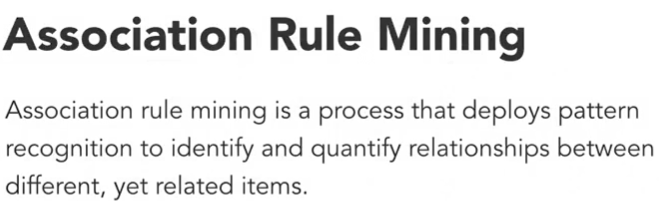

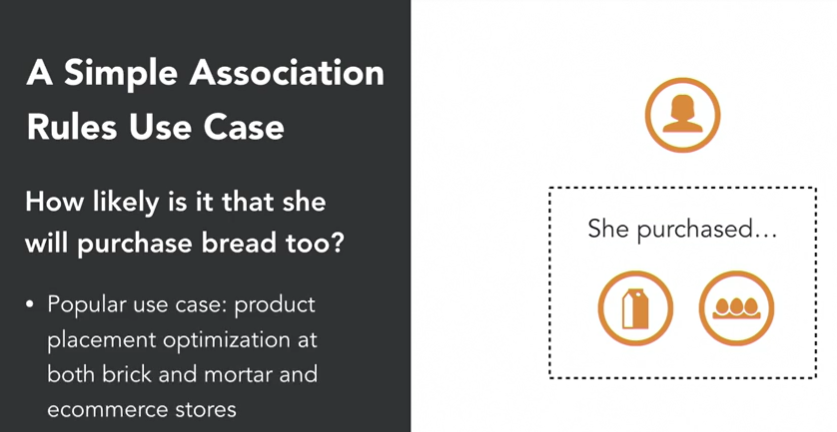

Association rules helps answer questions like:

if you buy milk and eggs, are you more likely to buy bread than anyone else who did not buy milk or eggs? 

Association rules seeks to find relationships between purchases made by customers. 
This is a very important for supermarkets and online stores for replacement of products and recommendations of products for existing or new customers.

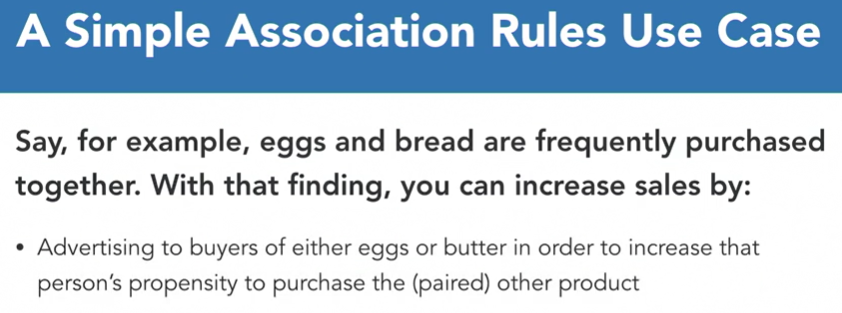

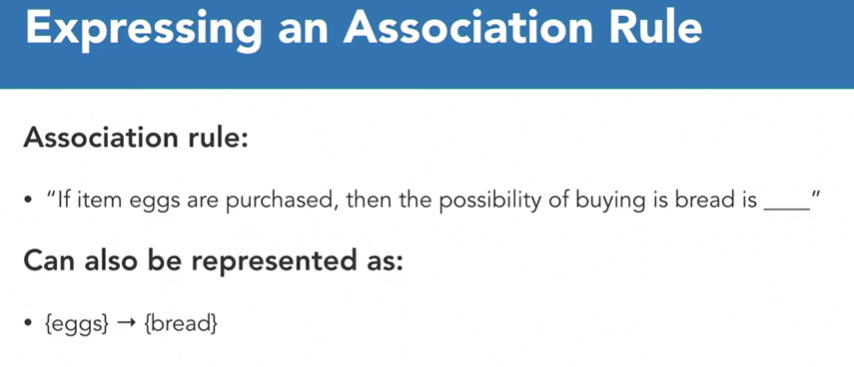

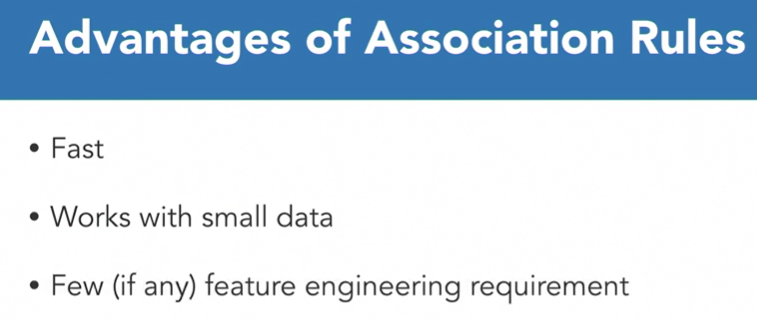

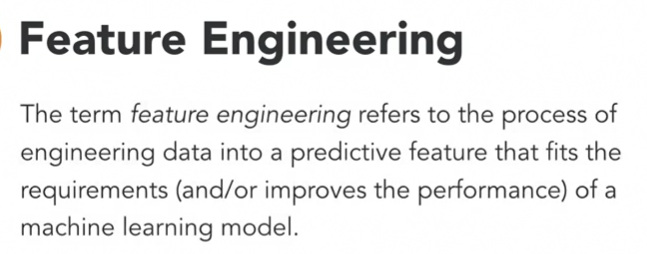

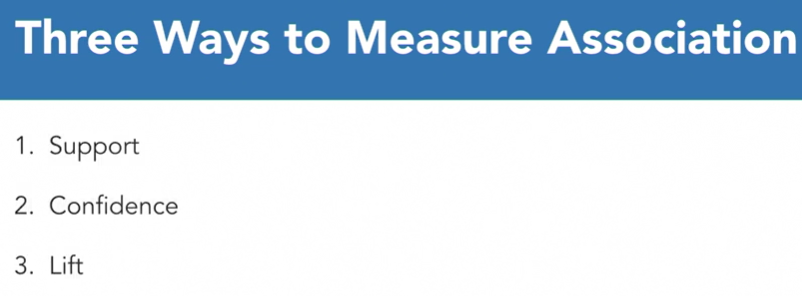

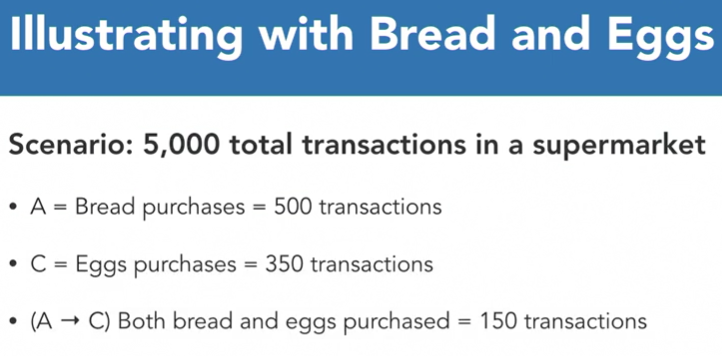

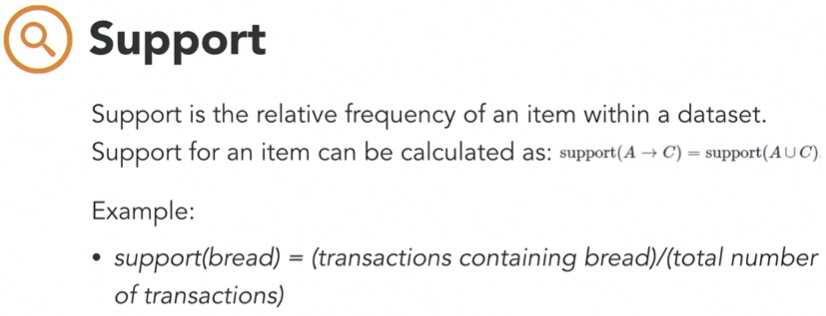

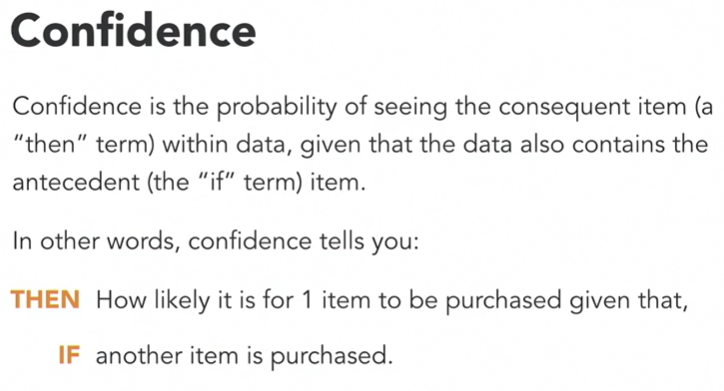

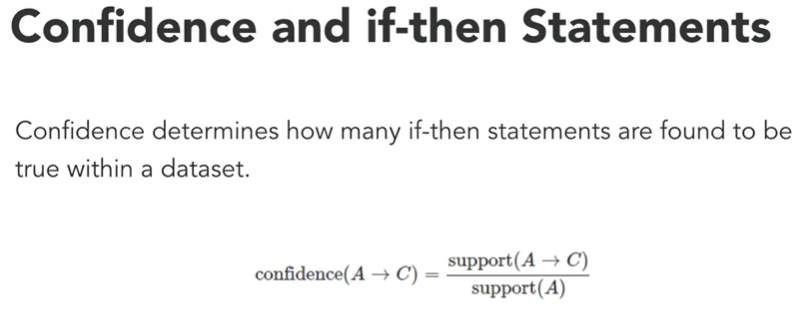

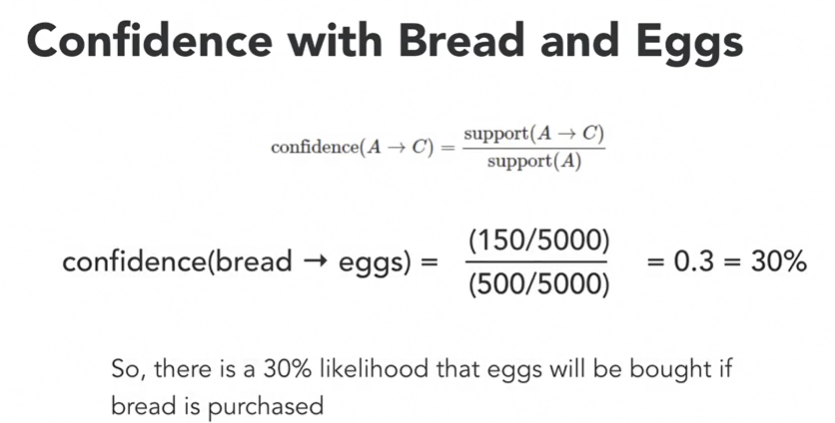

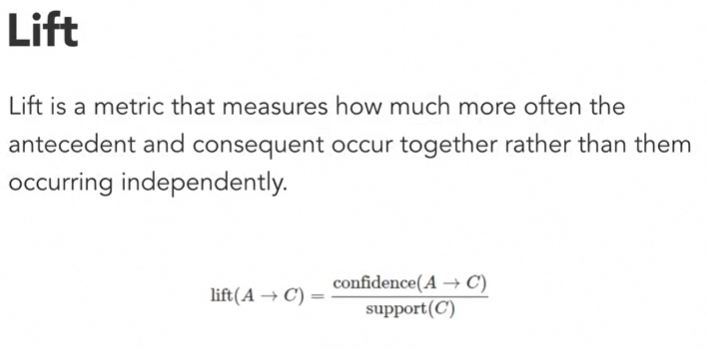

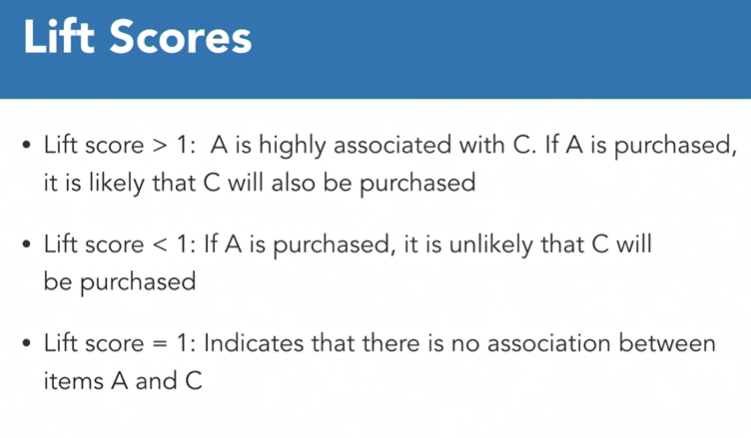

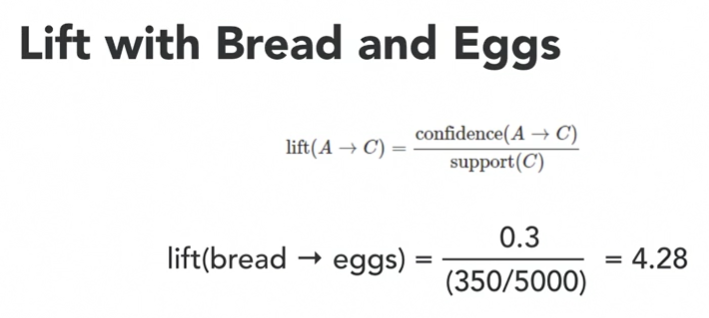

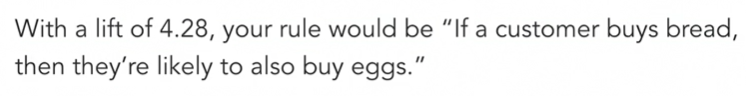

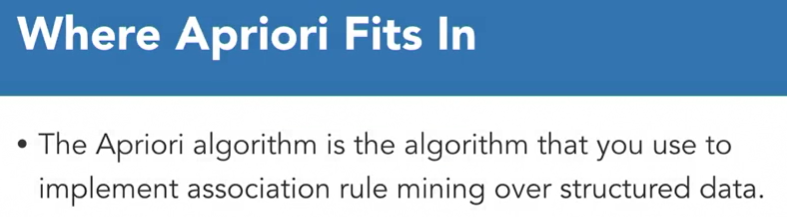

In [1]:
! pip install mlxtend

In [4]:
import os
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Data Format

In [5]:
address = os.path.join('groceries.csv')
data = pd.read_csv(address)

In [6]:
data.head()

,1,2,3,4,5,6,7,8,9
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN


# Data Coversion

In [7]:
basket_sets = pd.get_dummies(data)

In [8]:
basket_sets.head()

,1_Instant food products,1_UHT-milk,1_artif. sweetener,1_baby cosmetics,1_bags,1_baking powder,1_bathroom cleaner,1_beef,1_berries,1_beverages,...,9_sweet spreads,9_tea,9_vinegar,9_waffles,9_whipped/sour cream,9_white bread,9_white wine,9_whole milk,9_yogurt,9_zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Support Calculation

In [9]:
apriori(basket_sets, min_support=0.02)

,support,itemsets
0,0.030421,(7)
1,0.034951,(17)
2,0.029126,(23)
3,0.049191,(26)
4,0.064401,(47)
5,0.044660,(83)
6,0.024272,(90)
7,0.040453,(92)
8,0.038835,(99)
9,0.033981,(100)


Theres 35 Items with support of 0.02 or above

In [10]:
apriori(basket_sets, min_support=0.02, use_colnames=True)

,support,itemsets
0,0.030421,(1_beef)
1,0.034951,(1_canned beer)
2,0.029126,(1_chicken)
3,0.049191,(1_citrus fruit)
4,0.064401,(1_frankfurter)
5,0.044660,(1_other vegetables)
6,0.024272,(1_pip fruit)
7,0.040453,(1_pork)
8,0.038835,(1_rolls/buns)
9,0.033981,(1_root vegetables)


In [11]:
df = basket_sets

frequent_itemsets = apriori(basket_sets, min_support=0.002, use_colnames=True)

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x:len(x))

### to see number of items per transactions

frequent_itemsets

,support,itemsets,length
0,0.006472,(1_UHT-milk),1
1,0.030421,(1_beef),1
2,0.011974,(1_berries),1
3,0.008414,(1_beverages),1
4,0.014887,(1_bottled beer),1
...,...,...,...
844,0.002265,"(3_pip fruit, 5_other vegetables, 6_whole milk)",3
845,0.002589,"(4_other vegetables, 3_root vegetables, 5_whol...",3
846,0.002913,"(5_yogurt, 3_whole milk, 4_curd)",3
847,0.003236,"(5_other vegetables, 6_whole milk, 4_root vege...",3


In [12]:
### Lets filter out the rows with only one item.

frequent_itemsets[frequent_itemsets['length'] >= 3]

,support,itemsets,length
820,0.002589,"(3_other vegetables, 1_beef, 2_root vegetables)",3
821,0.002589,"(1_chicken, 2_other vegetables, 3_whole milk)",3
822,0.002589,"(1_citrus fruit, 2_other vegetables, 3_whole m...",3
823,0.003236,"(2_tropical fruit, 1_citrus fruit, 3_pip fruit)",3
824,0.002589,"(3_other vegetables, 1_citrus fruit, 4_whole m...",3
825,0.002265,"(5_other vegetables, 6_whole milk, 1_frankfurter)",3
826,0.002265,"(3_other vegetables, 4_whole milk, 1_pork)",3
827,0.003560,"(1_root vegetables, 2_other vegetables, 3_whol...",3
828,0.002589,"(3_soda, 2_rolls/buns, 1_sausage)",3
829,0.002265,"(3_other vegetables, 1_sausage, 4_whole milk)",3


# Association Rules

## Confidence

In [13]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2_sausage),(1_frankfurter),0.011327,0.064401,0.011327,1.000000,15.527638,0.010597,inf
1,(7_pastry),(1_frankfurter),0.005178,0.064401,0.002589,0.500000,7.763819,0.002256,1.871197
2,(2_ham),(1_sausage),0.007120,0.076052,0.004531,0.636364,8.367505,0.003989,2.540858
3,(2_meat),(1_sausage),0.006796,0.076052,0.004854,0.714286,9.392097,0.004338,3.233819
4,(3_beef),(1_sausage),0.004854,0.076052,0.002589,0.533333,7.012766,0.002220,1.979889


If sausages are purchased, it is extremely likely that frankfurter are purchased.

## Lift

In [14]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1_beef),(2_citrus fruit),0.030421,0.028803,0.005502,0.180851,6.278986,0.004625,1.185618
1,(2_citrus fruit),(1_beef),0.028803,0.030421,0.005502,0.191011,6.278986,0.004625,1.198508
2,(1_beef),(2_other vegetables),0.030421,0.058900,0.003236,0.106383,1.806173,0.001444,1.053136
3,(2_other vegetables),(1_beef),0.058900,0.030421,0.003236,0.054945,1.806173,0.001444,1.025950
4,(1_beef),(2_root vegetables),0.030421,0.036893,0.005502,0.180851,4.902016,0.004379,1.175741


If citrus fruit is purchased is likely that beef willl be purchased

## Lift and Confidence

In [18]:
rules[(rules['lift'] >= 5) & (rules['confidence']>=0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
92,(2_sausage),(1_frankfurter),0.011327,0.064401,0.011327,1.000000,15.527638,0.010597,inf
137,(7_pastry),(1_frankfurter),0.005178,0.064401,0.002589,0.500000,7.763819,0.002256,1.871197
238,(2_ham),(1_sausage),0.007120,0.076052,0.004531,0.636364,8.367505,0.003989,2.540858
243,(2_meat),(1_sausage),0.006796,0.076052,0.004854,0.714286,9.392097,0.004338,3.233819
259,(3_beef),(1_sausage),0.004854,0.076052,0.002589,0.533333,7.012766,0.002220,1.979889
...,...,...,...,...,...,...,...,...,...
959,"(5_other vegetables, 4_root vegetables)",(6_whole milk),0.005178,0.009385,0.003236,0.625000,66.594828,0.003188,2.641640
960,"(6_whole milk, 4_root vegetables)",(5_other vegetables),0.003883,0.012621,0.003236,0.833333,66.025641,0.003187,5.924272
964,"(7_butter, 5_other vegetables)",(6_whole milk),0.002589,0.009385,0.002265,0.875000,93.232759,0.002241,7.924919
965,"(7_butter, 6_whole milk)",(5_other vegetables),0.002913,0.012621,0.002265,0.777778,61.623932,0.002229,4.443204


Now we can see here at row index position 779, we see that if whole milk, in other words,
item A is purchased, then it's very likely that other vegetable will also be purchased in the same transaction, 
where other vegetable is item C. We know this by looking at the lift and the confidence of this unique combination. 

So if you look at the lift here, it's equal to 129.7. This indicates a high likelihood that C will be purchased in the same transaction if A is purchased. 
In other words, a high likelihood that other vegetable will be purchased in the same transaction if milk is purchased, 

and looking at the confidence, that's right here, we see we have a value of 0.92, indicating a high degree of confidence in this prediction. 

You can use this exact method to start making recommendations for products that should be stocked up and placed nearby one another in a store